E20CSE018 Lab-2

QUES:1 Download the dataset from https://www.openml.org/d/554 . The MNIST database contains a total of
70000 examples of handwritten digits of size 28x28 pixels, labelled from 0 to 9. You can use
function fetch_openml("mnist_784") to directly download.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
import warnings
warnings.filterwarnings("ignore") 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784")
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

Ques:2 Fetch_openml function returns a data bunch. Using its attributes print the shape of the input data
and target data. It should be (70,000, 784) and (70,000,) respectively.

In [ ]:
print(mnist.data.shape)
print(mnist.target.shape)
print(np.unique(mnist.target))

(70000, 784)
(70000,)
['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


Ques:3 Display the top ten images using matplotlib. You will be required to reshape the dataset
temporarily into (70,000, 28, 28) dimensions.


In [ ]:
data2 = np.array(mnist.data).reshape(70000, 28, 28)

<Figure size 432x288 with 0 Axes>

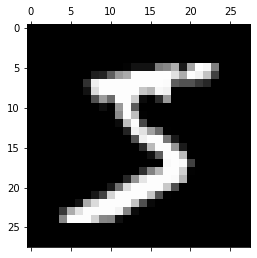

<Figure size 432x288 with 0 Axes>

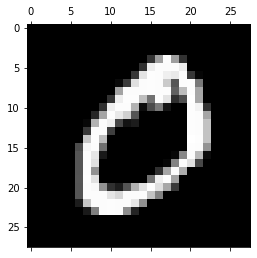

<Figure size 432x288 with 0 Axes>

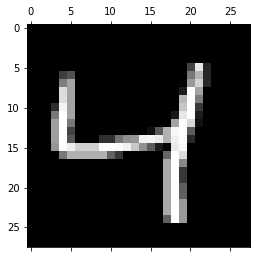

<Figure size 432x288 with 0 Axes>

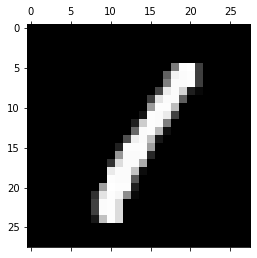

<Figure size 432x288 with 0 Axes>

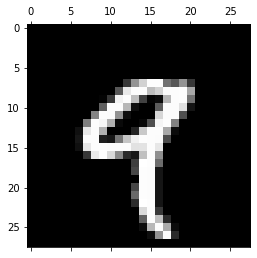

<Figure size 432x288 with 0 Axes>

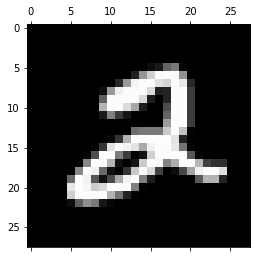

<Figure size 432x288 with 0 Axes>

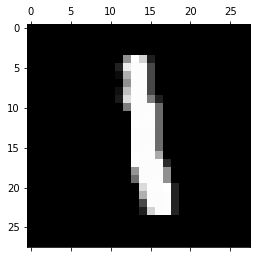

<Figure size 432x288 with 0 Axes>

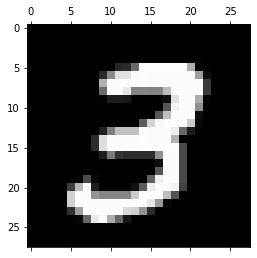

<Figure size 432x288 with 0 Axes>

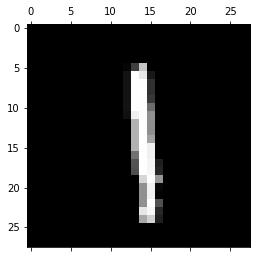

<Figure size 432x288 with 0 Axes>

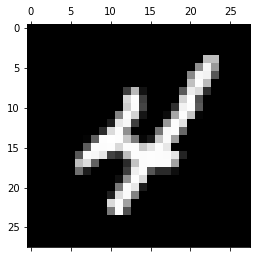

In [ ]:
for i in range(10):
  plt.gray()
  plt.matshow(data2[i])
  plt.show()

Ques:4 Define X matrix (70,000, 784) and y vector (target feature)

In [ ]:
X = mnist.data
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y = mnist.target
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

Ques:5 Transform: FFN is sensitive to feature scaling, so it is highly recommended toscale your data.
For example, scale each attribute on the input vector X to [0, 1] or [-1, +1], or standardize it to
have mean 0 and variance 1.

In [ ]:
X = X/255
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Ques:6 Split the dataset into 70% for training and rest 30% for testing
(sklearn.model_selection.train_test_split function)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

Ques:7 Train FFN using built-in function on the training set MLPclassifier()constructor with
following settings:
a. only one hidden layer consisting of just 64 neurons
b. Set the max_iter to a very low value such as 10.

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes = (64,),max_iter=10).fit(x_train, y_train)
clf

MLPClassifier(hidden_layer_sizes=(64,), max_iter=10)

In [ ]:
y_pred = clf.predict(x_test)
y_pred

array(['6', '2', '7', ..., '4', '6', '8'], dtype='<U1')

Ques:8 Use the trained model to predict on the test set and then (15)
a. Print 'Accuracy' obtained on the testing dataset i.e. (sklearn.metrics.accuracy_score function)
b. Precision, Recall and F1 scores (sklearn.metrics.precision_recall_fscore_support)

In [ ]:
print("ACCURACY:",accuracy_score(y_test, y_pred)*100)

ACCURACY: 96.44285714285714


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred)

(array([0.97271422, 0.97156984, 0.96161049, 0.9388587 , 0.95925216,
        0.96861702, 0.97420635, 0.97780925, 0.96498249, 0.95541401]),
 array([0.97880539, 0.98661088, 0.96704331, 0.95750577, 0.96994668,
        0.94695788, 0.98249125, 0.96057514, 0.94189453, 0.94844358]),
 array([0.9757503 , 0.97903259, 0.96431925, 0.94809056, 0.96456978,
        0.957665  , 0.97833126, 0.96911558, 0.95329874, 0.95191604]),
 array([2076, 2390, 2124, 2165, 2063, 1923, 1999, 2156, 2048, 2056]))

In [ ]:
per = [0.4,0.25,0.2,0.1]
accuracy = []
for i in per:
  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=i,shuffle=True)
  y_pred = clf.predict(X_test)
  accuracy.append(accuracy_score(y_test,y_pred))
print(accuracy)

[0.9743928571428572, 0.9747428571428571, 0.9760714285714286, 0.9747142857142858]


Ques:9 Compare and analyse the test accuracy for different train-test splits of data such as 60-40, 75-25,
80-20 and 90-10 with the help of suitable graphs.

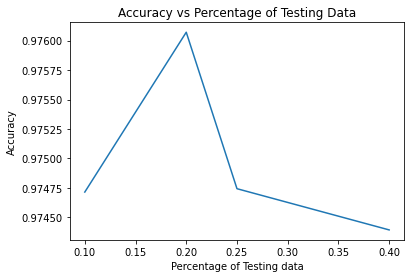

In [ ]:
import matplotlib.pyplot as plt
plt.plot(per,accuracy)
plt.xlabel("Percentage of Testing data")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Percentage of Testing Data")
plt.show()